In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Exploratory Data Analysis**

In [4]:
teams = pd.read_csv("nfl_teams.csv", index_col=0)
scores = pd.read_csv("spreadspoke_scores.csv")

In [5]:
scores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,...,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,...,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,...,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,...,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,...,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
teams.head()

,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
team_name,,,,,,,
Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN


In [7]:
scores["team_home"].value_counts()

,count
team_home,
San Francisco 49ers,497
Dallas Cowboys,495
Pittsburgh Steelers,490
Green Bay Packers,484
Philadelphia Eagles,483
Minnesota Vikings,483
Denver Broncos,483
Miami Dolphins,481
Kansas City Chiefs,480


In [8]:
scores[scores["team_home"] == "Los Angeles Rams"]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
14,9/16/1966,1966,2,False,Los Angeles Rams,31.0,17.0,Chicago Bears,NaN,NaN,...,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,9/30/1966,1966,4,False,Los Angeles Rams,34.0,3.0,San Francisco 49ers,NaN,NaN,...,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,10/30/1966,1966,8,False,Los Angeles Rams,3.0,17.0,Baltimore Colts,NaN,NaN,...,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,11/13/1966,1966,10,False,Los Angeles Rams,55.0,14.0,New York Giants,NaN,NaN,...,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,11/20/1966,1966,11,False,Los Angeles Rams,21.0,6.0,Minnesota Vikings,NaN,NaN,...,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13952,11/11/2024,2024,10,False,Los Angeles Rams,NaN,NaN,Miami Dolphins,NaN,NaN,...,NaN,indoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13974,11/24/2024,2024,12,False,Los Angeles Rams,NaN,NaN,Philadelphia Eagles,NaN,NaN,...,NaN,indoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13999,12/8/2024,2024,14,False,Los Angeles Rams,NaN,NaN,Buffalo Bills,NaN,NaN,...,NaN,indoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14048,12/29/2024,2024,17,False,Los Angeles Rams,NaN,NaN,Arizona Cardinals,NaN,NaN,...,NaN,indoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
scores["schedule_week"].value_counts()

,count
schedule_week,
2,863
1,858
13,858
14,854
12,854
11,836
3,814
10,800
4,789


# **Cleaning the Data**
* Machine Algorithims can only work with numbers, and can't work with objects

In [10]:
scores.dtypes

,0
schedule_date,object
schedule_season,int64
schedule_week,object
schedule_playoff,bool
team_home,object
score_home,float64
score_away,float64
team_away,object
team_favorite_id,object
spread_favorite,float64


In [11]:
scores["schedule_date"] = pd.to_datetime(scores["schedule_date"])

In [12]:
scores.dtypes

,0
schedule_date,datetime64[ns]
schedule_season,int64
schedule_week,object
schedule_playoff,bool
team_home,object
score_home,float64
score_away,float64
team_away,object
team_favorite_id,object
spread_favorite,float64


Turning The Home vs. Away into a Numeric Value (1 = Home, 0 = Away)

In [13]:
scores.sort_values(by="team_home")

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
7988,2002-11-03,2002,9,False,Arizona Cardinals,14.0,27.0,St. Louis Rams,LAR,-5.0,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6608,1997-09-07,1997,2,False,Arizona Cardinals,25.0,22.0,Dallas Cowboys,DAL,-9.5,...,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11269,2014-12-07,2014,14,False,Arizona Cardinals,17.0,14.0,Kansas City Chiefs,KC,-2.5,...,NaN,indoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13233,2022-09-11,2022,1,False,Arizona Cardinals,21.0,44.0,Kansas City Chiefs,KC,-6.0,...,NaN,indoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9918,2009-12-06,2009,13,False,Arizona Cardinals,30.0,17.0,Minnesota Vikings,MIN,-3.0,...,NaN,indoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7859,2002-01-06,2001,17,False,Washington Redskins,20.0,17.0,Arizona Cardinals,WAS,-3.5,...,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12571,2019-11-17,2019,11,False,Washington Redskins,17.0,34.0,New York Jets,WAS,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7886,2002-09-08,2002,1,False,Washington Redskins,31.0,23.0,Arizona Cardinals,WAS,-6.0,...,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7696,2001-10-21,2001,6,False,Washington Redskins,17.0,14.0,Carolina Panthers,CAR,-3.5,...,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
scores["team_home"] = scores["team_home"].astype("category")
scores["home_code"] = scores["team_home"].cat.codes

In [15]:
scores["team_away"] = scores["team_away"].astype("category")
scores["opp_code"] = scores["team_away"].cat.codes

In [16]:
scores["schedule_season"] = scores["schedule_season"].astype(int)

In [17]:
scores['schedule_date'] = pd.to_datetime(scores['schedule_date'])

In [18]:
# Convert non-numeric weeks to NaN
scores['schedule_week'] = pd.to_numeric(scores['schedule_week'], errors='coerce')
# Optional: Handle NaN values (e.g., replace with 0 or drop them)
scores['schedule_week'] = scores['schedule_week'].fillna(8).astype(int)


Create a new column "Result" Based on whether the home team won or lost
* Use np.where to use a vectorized operation
* A vectorized operation

In [19]:
scores['result'] = np.where(scores['score_home'] > scores['score_away'], 1, 0)

In [20]:
graph_data = scores.copy()

In [21]:
# Create a scores difference
graph_data['score_difference'] = graph_data['score_home'] - graph_data['score_away']

# **Graphing the Data**

scores

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [24]:
train = scores[scores['schedule_date'] < '2023-03-03']

In [25]:
test = scores[(scores['schedule_date'] > '2023-03-03') & (scores['schedule_date'] < '2024-02-11')]

In [26]:
predictors = ['home_code', 'opp_code', 'schedule_week']

In [27]:
rf.fit(train[predictors], train["result"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [28]:
preds = rf.predict(test[predictors])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
acc = accuracy_score(test['result'], preds)

In [31]:
acc

0.49295774647887325

In [32]:
combined = pd.DataFrame(dict(actual=test["result"], prediction=preds))

In [33]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,40,84
1,60,100


In [34]:
from sklearn.metrics import precision_score

**When We Predicted Team, the Team Only won 55% of the time**

In [35]:
precision_score(test["result"], preds)

0.5434782608695652

# **Improving Precision with Rolling Averages**

In [36]:
grouped_games = scores.groupby("team_home")

<ipython-input-36-c891a345be77>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_games = scores.groupby("team_home")


In [37]:
group = grouped_games.get_group("San Diego Chargers").copy()

In [38]:
group

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,home_code,opp_code,result
2,1966-09-04,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,5,1
6,1966-09-10,1966,2,False,San Diego Chargers,24.0,0.0,New England Patriots,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,25,1
45,1966-10-02,1966,5,False,San Diego Chargers,44.0,10.0,Miami Dolphins,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,23,1
89,1966-10-30,1966,9,False,San Diego Chargers,24.0,17.0,Denver Broncos,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,11,1
111,1966-11-13,1966,11,False,San Diego Chargers,19.0,41.0,Oakland Raiders,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11740,2016-11-06,2016,9,False,San Diego Chargers,43.0,35.0,Tennessee Titans,LAC,-3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,40,1
11752,2016-11-13,2016,10,False,San Diego Chargers,24.0,31.0,Miami Dolphins,LAC,-4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,23,0
11799,2016-12-04,2016,13,False,San Diego Chargers,21.0,28.0,Tampa Bay Buccaneers,LAC,-3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,38,0
11832,2016-12-18,2016,15,False,San Diego Chargers,16.0,19.0,Oakland Raiders,LVR,-2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,29,0


In [39]:
scores.head(1)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,home_code,opp_code,result
0,1966-09-02,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,29,0


In [40]:
scores.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'home_code', 'opp_code', 'result'],
      dtype='object')

Drop the NA values for team_favorite_id, spread_favorite, and weather for machine learning to better determine whether or not a game is a win or loss

In [41]:
# Drop columns without team_favorite_id or spread_favorite_id
features_to_keep = ['team_home', 'team_away', 'team_favorite_id', 'spread_favorite', 'weather_wind_mph', 'weather_detail', 'weather_temperature',
                    'schedule_week', 'schedule_season', 'score_home', 'score_away', 'result']

# Create a new Dataframe with the selected columns
scores_cleaned = scores[features_to_keep].copy()

# Clean the data
scores['weather_wind_mph'].fillna(0)

# Drop rows with no team_favorite_id or spread_favorite_id
scores.dropna(inplace=True)

In [42]:
scores_cleaned

,team_home,team_away,team_favorite_id,spread_favorite,weather_wind_mph,weather_detail,weather_temperature,schedule_week,schedule_season,score_home,score_away,result
0,Miami Dolphins,Oakland Raiders,NaN,NaN,6.0,NaN,83.0,1,1966,14.0,23.0,0
1,Houston Oilers,Denver Broncos,NaN,NaN,7.0,NaN,81.0,1,1966,45.0,7.0,1
2,San Diego Chargers,Buffalo Bills,NaN,NaN,7.0,NaN,70.0,1,1966,27.0,7.0,1
3,Miami Dolphins,New York Jets,NaN,NaN,11.0,NaN,82.0,2,1966,14.0,19.0,0
4,Green Bay Packers,Baltimore Colts,NaN,NaN,8.0,NaN,64.0,1,1966,24.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14068,New York Jets,Miami Dolphins,NaN,NaN,NaN,NaN,NaN,18,2024,NaN,NaN,0
14069,Philadelphia Eagles,New York Giants,NaN,NaN,NaN,NaN,NaN,18,2024,NaN,NaN,0
14070,Pittsburgh Steelers,Cincinnati Bengals,NaN,NaN,NaN,NaN,NaN,18,2024,NaN,NaN,0
14071,Tampa Bay Buccaneers,New Orleans Saints,NaN,NaN,NaN,NaN,NaN,18,2024,NaN,NaN,0


In [43]:
scores_cleaned.groupby('team_home')

<ipython-input-43-9dd253bea6d5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores_cleaned.groupby('team_home')


In [44]:
scores_betting = pd.DataFrame(scores_cleaned)

In [45]:
scores_betting.index = range(scores_betting.shape[0])

In [46]:
print(scores_betting.index)

RangeIndex(start=0, stop=14073, step=1)


# **Step 1: Prepare the Data**

In [47]:
import pandas as pd
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# From the metrics library of sklearn, Import classification_report, and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
# Load the data
data = scores_cleaned.copy()

In [49]:
data.columns

Index(['team_home', 'team_away', 'team_favorite_id', 'spread_favorite',
       'weather_wind_mph', 'weather_detail', 'weather_temperature',
       'schedule_week', 'schedule_season', 'score_home', 'score_away',
       'result'],
      dtype='object')

In [50]:
data.head(5)

,team_home,team_away,team_favorite_id,spread_favorite,weather_wind_mph,weather_detail,weather_temperature,schedule_week,schedule_season,score_home,score_away,result
0,Miami Dolphins,Oakland Raiders,NaN,NaN,6.0,NaN,83.0,1,1966,14.0,23.0,0
1,Houston Oilers,Denver Broncos,NaN,NaN,7.0,NaN,81.0,1,1966,45.0,7.0,1
2,San Diego Chargers,Buffalo Bills,NaN,NaN,7.0,NaN,70.0,1,1966,27.0,7.0,1
3,Miami Dolphins,New York Jets,NaN,NaN,11.0,NaN,82.0,2,1966,14.0,19.0,0
4,Green Bay Packers,Baltimore Colts,NaN,NaN,8.0,NaN,64.0,1,1966,24.0,3.0,1


In [51]:
print(data['weather_detail'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
14068    NaN
14069    NaN
14070    NaN
14071    NaN
14072    NaN
Name: weather_detail, Length: 14073, dtype: object


In [52]:
# Drop the 'weather_detail' column since both teams play in the same place, hence
# the same weather conditions
data.drop('weather_detail', axis=1, inplace=True)

In [53]:
# Handle missing values
data.fillna({
    'weather_wind_mph': data['weather_wind_mph'].mean(),
    'weather_temperature': data['weather_temperature'].mean()
})

,team_home,team_away,team_favorite_id,spread_favorite,weather_wind_mph,weather_temperature,schedule_week,schedule_season,score_home,score_away,result
0,Miami Dolphins,Oakland Raiders,NaN,NaN,6.000000,83.000000,1,1966,14.0,23.0,0
1,Houston Oilers,Denver Broncos,NaN,NaN,7.000000,81.000000,1,1966,45.0,7.0,1
2,San Diego Chargers,Buffalo Bills,NaN,NaN,7.000000,70.000000,1,1966,27.0,7.0,1
3,Miami Dolphins,New York Jets,NaN,NaN,11.000000,82.000000,2,1966,14.0,19.0,0
4,Green Bay Packers,Baltimore Colts,NaN,NaN,8.000000,64.000000,1,1966,24.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
14068,New York Jets,Miami Dolphins,NaN,NaN,7.562475,59.038643,18,2024,NaN,NaN,0
14069,Philadelphia Eagles,New York Giants,NaN,NaN,7.562475,59.038643,18,2024,NaN,NaN,0
14070,Pittsburgh Steelers,Cincinnati Bengals,NaN,NaN,7.562475,59.038643,18,2024,NaN,NaN,0
14071,Tampa Bay Buccaneers,New Orleans Saints,NaN,NaN,7.562475,59.038643,18,2024,NaN,NaN,0


In [54]:
# Create unique_hometeams and unique_awayteams to store all unique team names
unique_hometeams = set(data['team_home'])
unique_awayteams = set(data['team_away'])

In [55]:
import pandas as pd

# DataFrame with team names
teamNameData = {
    'team_home': ['Houston Texans', 'Philadelphia Eagles', 'Baltimore Colts',
                  'Pittsburgh Steelers', 'Cincinnati Bengals', 'Cleveland Browns',
                  'Tennessee Oilers', 'Los Angeles Raiders', 'Chicago Bears',
                  'Houston Oilers', 'Oakland Raiders', 'New York Jets',
                  'New Orleans Saints', 'St. Louis Rams', 'Tennessee Titans',
                  'Denver Broncos', 'Los Angeles Rams', 'Los Angeles Chargers',
                  'Washington Redskins', 'St. Louis Cardinals', 'New England Patriots',
                  'Las Vegas Raiders', 'San Francisco 49ers', 'New York Giants',
                  'Dallas Cowboys', 'Indianapolis Colts', 'Carolina Panthers',
                  'Boston Patriots', 'Minnesota Vikings', 'San Diego Chargers',
                  'Tampa Bay Buccaneers', 'Atlanta Falcons', 'Miami Dolphins',
                  'Arizona Cardinals', 'Jacksonville Jaguars', 'Washington Football Team',
                  'Washington Commanders', 'Baltimore Ravens', 'Phoenix Cardinals',
                  'Green Bay Packers', 'Buffalo Bills', 'Kansas City Chiefs',
                  'Detroit Lions', 'Seattle Seahawks'],
    'team_away': ['Houston Texans', 'Philadelphia Eagles', 'Baltimore Colts',
                  'Pittsburgh Steelers', 'Cincinnati Bengals', 'Cleveland Browns',
                  'Tennessee Oilers', 'Los Angeles Raiders', 'Chicago Bears',
                  'Houston Oilers', 'Oakland Raiders', 'New York Jets',
                  'New Orleans Saints', 'St. Louis Rams', 'Tennessee Titans',
                  'Denver Broncos', 'Los Angeles Rams', 'Los Angeles Chargers',
                  'Washington Redskins', 'St. Louis Cardinals', 'New England Patriots',
                  'Las Vegas Raiders', 'San Francisco 49ers', 'New York Giants',
                  'Dallas Cowboys', 'Indianapolis Colts', 'Carolina Panthers',
                  'Boston Patriots', 'Minnesota Vikings', 'San Diego Chargers',
                  'Tampa Bay Buccaneers', 'Atlanta Falcons', 'Miami Dolphins',
                  'Arizona Cardinals', 'Jacksonville Jaguars', 'Washington Football Team',
                  'Washington Commanders', 'Baltimore Ravens', 'Phoenix Cardinals',
                  'Green Bay Packers', 'Buffalo Bills', 'Kansas City Chiefs',
                  'Detroit Lions', 'Seattle Seahawks']}

# Create a mapping of unique team names to numeric IDs

# Create a dataframe
teamsByNum = pd.DataFrame(teamNameData)

# Print the columns in teamsByNum
print(teamsByNum.columns)

# Print the columns in data
data.columns

# Create a mapping where each team gets a unique ID

# Map team names to an ID
team_mapping_home = {team: i for i, team in enumerate(teamsByNum['team_home'])}

# Use the mapping to convert the 'home_team_id' and 'home_away_id' columns
data['team_home'] = data['team_home'].map(team_mapping_home)
data['team_away'] = data['team_away'].map(team_mapping_home)

# Display the updated DataFrame with numeric team IDS
print(data)

Index(['team_home', 'team_away'], dtype='object')
      team_home team_away team_favorite_id  spread_favorite  weather_wind_mph  \
0            32        10              NaN              NaN               6.0   
1             9        15              NaN              NaN               7.0   
2            29        40              NaN              NaN               7.0   
3            32        11              NaN              NaN              11.0   
4            39         2              NaN              NaN               8.0   
...         ...       ...              ...              ...               ...   
14068        11        32              NaN              NaN               NaN   
14069         1        23              NaN              NaN               NaN   
14070         3         4              NaN              NaN               NaN   
14071        30        12              NaN              NaN               NaN   
14072        14         0              NaN              NaN

In [56]:
# Change team_favorite_id into numerical values for the Random Forest Classifier
unique_team_favorite = set(data['team_favorite_id'])

# Print unique_team_favorite
print(unique_team_favorite)

{'LAC', 'DET', 'NO', 'NYG', 'KC', 'JAX', 'ARI', 'WAS', 'MIN', 'PIT', 'TEN', 'LVR', 'CIN', 'CHI', 'NE', 'CAR', 'SF', 'ATL', 'LAR', 'IND', 'NYJ', 'LV', 'BAL', 'SEA', 'PHI', 'MIA', 'DEN', 'HOU', 'CLE', 'BUF', 'TB', 'DAL', 'GB', 'PICK', 'NJY', nan}


In [57]:
data.dropna()

,team_home,team_away,team_favorite_id,spread_favorite,weather_wind_mph,weather_temperature,schedule_week,schedule_season,score_home,score_away,result
170,39,41,GB,-14.0,7.0,54.0,8,1966,35.0,10.0,1
350,39,10,GB,-13.5,12.0,60.0,8,1967,33.0,14.0,1
538,2,11,IND,-18.0,12.0,66.0,8,1968,7.0,16.0,0
727,41,28,MIN,-12.0,14.0,55.0,8,1969,23.0,7.0,1
916,2,24,IND,-2.5,11.0,59.0,8,1970,16.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...
13908,16,28,MIN,-3.0,0.0,72.0,8,2024,30.0,20.0,1
13912,42,14,DET,-12.0,0.0,72.0,8,2024,52.0,14.0,1
13913,0,25,HOU,-4.5,0.0,72.0,8,2024,23.0,20.0,1
13915,21,41,KC,-8.5,0.0,72.0,8,2024,20.0,27.0,0


In [58]:
data = data.fillna({
    'weather_wind_mph': data['weather_wind_mph'].mean(),
    'weather_temperature': data['weather_temperature'].mean()
})


data = data.dropna(subset=['score_home', 'score_away'])
print(data.isnull().sum())

# Drop the team_favorite_id column
data = data.drop(columns=['team_favorite_id'])

# Replace spread_favorite NaN values with the mean
data = data.fillna({
    'spread_favorite': data['spread_favorite'].mean()
})

team_home                 0
team_away                 0
team_favorite_id       2479
spread_favorite        2479
weather_wind_mph          0
weather_temperature       0
schedule_week             0
schedule_season           0
score_home                0
score_away                0
result                    0
dtype: int64


In [59]:
# Create the variable inputs (X) and the result (y)
X = data.drop(columns=['result'])
y = data['result']

In [60]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 3: Train the Model**

In [61]:
# Intialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, criterion='gini',
                               min_samples_split=20, min_samples_leaf=5,
                               random_state=42)

In [62]:
# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

# **Evaluate the Model**

In [63]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1198   12]
 [   4 1571]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1210
           1       0.99      1.00      0.99      1575

    accuracy                           0.99      2785
   macro avg       0.99      0.99      0.99      2785
weighted avg       0.99      0.99      0.99      2785



# **Visualizing Our Results**

In [64]:
corr = data.corr(method='pearson')
corr

,team_home,team_away,spread_favorite,weather_wind_mph,weather_temperature,schedule_week,schedule_season,score_home,score_away,result
team_home,1.000000,-0.012746,-0.008623,-0.092120,0.121640,0.008123,0.072902,0.023922,-0.003253,0.015713
team_away,-0.012746,1.000000,0.006717,-0.033500,0.015453,0.009194,0.074666,0.016618,0.013244,0.015170
spread_favorite,-0.008623,0.006717,1.000000,-0.027540,0.055124,-0.072577,-0.005548,-0.128335,0.105070,-0.136460
weather_wind_mph,-0.092120,-0.033500,-0.027540,1.000000,-0.440867,0.023665,-0.307855,-0.071099,-0.120837,0.026305
weather_temperature,0.121640,0.015453,0.055124,-0.440867,1.000000,-0.426564,0.174126,0.007984,0.073950,-0.033388
schedule_week,0.008123,0.009194,-0.072577,0.023665,-0.426564,1.000000,0.075245,0.024278,-0.005361,0.016088
schedule_season,0.072902,0.074666,-0.005548,-0.307855,0.174126,0.075245,1.000000,0.077774,0.109322,-0.002785
score_home,0.023922,0.016618,-0.128335,-0.071099,0.007984,0.024278,0.077774,1.000000,-0.034748,0.550491
score_away,-0.003253,0.013244,0.105070,-0.120837,0.073950,-0.005361,0.109322,-0.034748,1.000000,-0.569830
result,0.015713,0.015170,-0.136460,0.026305,-0.033388,0.016088,-0.002785,0.550491,-0.569830,1.000000


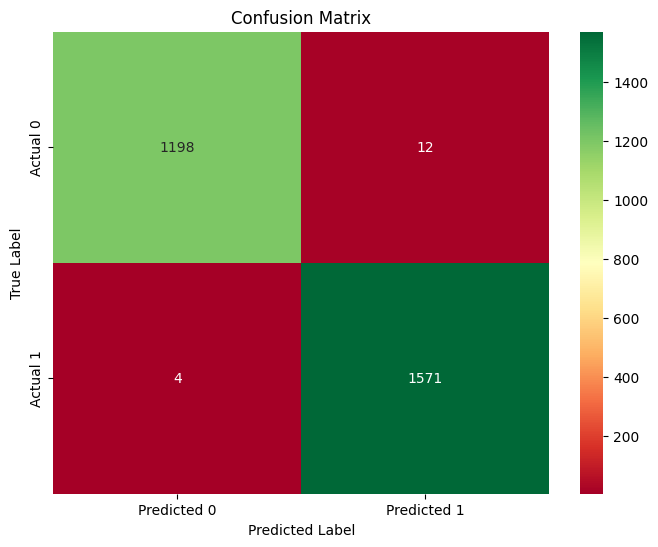

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# From sklearn.metrics Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap

# Use plt.figure(figsize=(8, 6)) to control the size
plt.figure(figsize=(8, 6))

# sns.heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', cbar=True,
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])

# Labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()